# PREPROCESSING

### This notebook contains all the preprocessing part. Below are the the differents tasks done:
- Some features contain nested dictionnaries (properties). We create one feature for each of the subfeature of the property column (['gender', 'nationality','document_type','issuing_state','date_of_expiry','issuing_country']
- We check that the integrity of facial and doc dataset (for ex make sure that attempt_id are the same etc..)
- We merge both dataset and make sure to keep a single attempt per user. We call this dataset valid_data: 
    - We select the first attempt by default. if several attempts and one of the attempts is clear for both facial and doc  then it means that it is the second attempt of the user. We assume here that even if someone cheats and attempts several times all the attempts after 2nd will be failed anyway.
- We create a rate_data dataframe that transform each features in a time series format (pass rate or failure rate)


### we have created the following datasets for our analysis: 
- data: contains both facial and doc data (even multiple attempts for a single user). Features are cleaned and data is consistent.
- valid_data: contains a single attempt per KYC process
- rate_data: contains time series data


In [1]:
import pandas as pd
import numpy as np
import ast

# Create the df data

In [2]:
doc=pd.read_csv('doc_reports.csv')

In [3]:
facial=pd.read_csv('facial_similarity_reports.csv')

In [6]:
## Convert column properties into several columns (one for each features)

In [7]:
n=0
max_=0
##some observations have less features within properties than other (for ex obs0 has nationality as a property while obs1 doesnt)
## as such we need to get the observation with the max largest number of features to then append the new features to the dataset
## that will hence contain some nan values for some of the newly created features. Those extracted features will be new features
## in our dataset
for i in range(len(doc)):
    if len(list(ast.literal_eval(doc.iloc[i].properties).keys()))>n:
        n=len(list(ast.literal_eval(doc.iloc[i].properties).keys()))
        max_=i
new_features=list(ast.literal_eval(doc.iloc[max_].properties).keys())
new_features




['gender',
 'nationality',
 'document_type',
 'issuing_state',
 'date_of_expiry',
 'issuing_country']

In [8]:

gender=[]
nationality=[]
document_type=[]
issuing_state=[]
date_of_expiry=[]
issuing_country=[]

new_feat=[gender,nationality,document_type,issuing_state,date_of_expiry,issuing_country]

doc.properties = doc.properties.map(lambda d : ast.literal_eval(d))

for i in range(len(doc)):
    for j in range(len(new_feat)):
        try:
            new_feat[j].append(doc.iloc[i].properties[new_features[j]])
        except:
            new_feat[j].append(np.nan)
            
for i in range(len(new_features)):
    doc[new_features[i]]=new_feat[i]
doc=doc.drop('properties', axis=1)

In [9]:
doc.created_at=pd.to_datetime(doc.created_at)

In [10]:
## same for facial. Except properties in facial contain only one feature, score

In [11]:
facial.properties = facial.properties.map(lambda d : ast.literal_eval(d))

In [12]:
facial = facial.join(pd.DataFrame(facial["properties"].to_dict()).T)
facial=facial.drop('properties',axis=1)

In [13]:
facial.created_at=pd.to_datetime(facial.created_at)

In [14]:
facial

,Unnamed: 0,user_id,result,face_comparison_result,created_at,facial_image_integrity_result,visual_authenticity_result,attempt_id,score
0,0,ab23fae164e34af0a1ad1423ce9fd9f0,clear,clear,2017-06-20 23:12:58+00:00,clear,consider,050a0596de424fab83c433eaa18b3f8d,NaN
1,1,15a84e8951254011b47412fa4e8f65b8,clear,clear,2017-06-20 23:16:04+00:00,clear,clear,f69c1e5f45a64e50a26740b9bfb978b7,NaN
2,2,ffb82fda52b041e4b9af9cb4ef298c85,clear,clear,2017-06-20 17:59:49+00:00,clear,clear,f9f84f3055714d8e8f7419dc984d1769,NaN
3,3,bd4a8b3e3601427e88aa1d9eab9f4290,clear,clear,2017-06-20 17:59:39+00:00,clear,clear,10a54a1ecf794404be959e030f11fef6,NaN
4,4,f52ad1c7e69543a9940c3e7f8ed28a39,clear,clear,2017-06-20 18:08:09+00:00,clear,clear,1f320d1d07de493292b7e0d5ebfb1cb9,NaN
5,5,6af503bb8b7d4054b13b4206ab4d30ff,clear,clear,2017-06-20 18:08:50+00:00,clear,clear,40475bea718e4eefa1681badad872a63,NaN
6,6,c7065821137c4e88be2d8d48e5ae0ed5,clear,clear,2017-06-20 18:11:36+00:00,clear,clear,e06eaa9e57fb4a959f3da2d8e6bd467c,NaN
7,7,c495a07929b344ed9da41d7b9eb7a6ea,clear,clear,2017-06-20 18:18:12+00:00,clear,clear,676eb988814c49c794c5002865c76379,NaN
8,8,b9d6d9645a714b0dabfdcc5048a29e57,clear,clear,2017-06-20 18:19:39+00:00,clear,clear,63eb06e3400e4b23b1d8c1794e8eaad4,NaN
9,9,bf0fc3bd3c2a4c80be34eb096717bc81,clear,clear,2017-06-20 18:30:27+00:00,clear,clear,7c1ff498161441cab0567e8b8ec3f3b6,NaN


In [15]:
common_features = set(doc.columns).intersection(set(facial.columns))
doc.user_id.equals(facial.user_id)

True

In [17]:
# check if common features have similar values. The ones that are displayed dont ahve similar values. All the other ones
# are basically duplciates
for c in common_features:
    if doc[c].equals(facial[c]):
        continue
    else:
        print(c)
        
    

result
attempt_id
created_at


In [18]:
#creaed at values, result and properties are expected to be different. Not attempt_id

In [19]:
not_identical_attempt_ids=pd.Series(facial.attempt_id == doc.attempt_id)
not_identical_attempt_ids[not_identical_attempt_ids==False].index[0]

168513

In [20]:
facial.iloc[168513].attempt_id, doc.iloc[168513].attempt_id

('96948966045741509980950989095520', '9.6949E+31')

In [21]:
#only one value. Error because of formatting. We can replace the value in doc by the correct one available in facial

In [22]:
doc.at[168513,'attempt_id']= facial.iloc[168513].attempt_id


In [23]:
#remove duplicate features
facial=facial.drop(['Unnamed: 0',
 'attempt_id',
 'user_id',
 'visual_authenticity_result'], axis=1)

doc=doc.add_suffix('_DOC')
doc=doc.rename(columns={'Unnamed: 0_DOC':'index_', 'attempt_id_DOC':'attempt_id','user_id_DOC':'user_id',
                       'visual_authenticity_result_DOC':'visual_authenticity_result'})
facial=facial.add_suffix('_FACIAL')


In [24]:
data = facial.merge(doc, on=facial.index)
data=data.drop('key_0',axis=1)

In [25]:
data.set_index('index_').head()

,result_FACIAL,face_comparison_result_FACIAL,created_at_FACIAL,facial_image_integrity_result_FACIAL,score_FACIAL,user_id,result_DOC,visual_authenticity_result,image_integrity_result_DOC,face_detection_result_DOC,...,attempt_id,police_record_result_DOC,compromised_document_result_DOC,sub_result_DOC,gender_DOC,nationality_DOC,document_type_DOC,issuing_state_DOC,date_of_expiry_DOC,issuing_country_DOC
index_,,,,,,,,,,,,,,,,,,,,,
0,clear,clear,2017-06-20 23:12:58+00:00,clear,NaN,ab23fae164e34af0a1ad1423ce9fd9f0,consider,consider,clear,clear,...,050a0596de424fab83c433eaa18b3f8d,clear,NaN,caution,Male,IRL,passport,NaN,2019-08-12,IRL
1,clear,clear,2017-06-20 23:16:04+00:00,clear,NaN,15a84e8951254011b47412fa4e8f65b8,clear,clear,clear,clear,...,f69c1e5f45a64e50a26740b9bfb978b7,clear,NaN,clear,Female,NaN,driving_licence,NaN,2023-02-28,GBR
2,clear,clear,2017-06-20 17:59:49+00:00,clear,NaN,ffb82fda52b041e4b9af9cb4ef298c85,clear,clear,clear,clear,...,f9f84f3055714d8e8f7419dc984d1769,clear,NaN,clear,Male,ITA,passport,NaN,2018-06-09,ITA
3,clear,clear,2017-06-20 17:59:39+00:00,clear,NaN,bd4a8b3e3601427e88aa1d9eab9f4290,clear,clear,clear,clear,...,10a54a1ecf794404be959e030f11fef6,clear,NaN,clear,Male,NaN,national_identity_card,NaN,NaN,FRA
4,clear,clear,2017-06-20 18:08:09+00:00,clear,NaN,f52ad1c7e69543a9940c3e7f8ed28a39,clear,clear,clear,clear,...,1f320d1d07de493292b7e0d5ebfb1cb9,clear,NaN,clear,Male,POL,national_identity_card,NaN,2019-05-29,POL


# Create the dataset valid_data

In [27]:
import matplotlib
%matplotlib inline

#delta between doc and facial unimportant in our case as it is the same day anyway.
data['created_at']=data.created_at_DOC.dt.strftime('%Y-%m-%d')
#data.created_at_FACIAL=data.created_at_FACIAL.dt.strftime('%Y-%m-%d')

In [30]:
#data=data.drop('created_at_DOC',axis=1)
#data=data.rename(columns={'created_at_FACIAL':'created_at'})

In [29]:
counts=data.user_id.value_counts()
several_attempts=counts[counts>1].index

In [30]:
single_attempts=set(data.user_id)-set(several_attempts)

In [31]:
data[data.user_id.isin(several_attempts)]

,result_FACIAL,face_comparison_result_FACIAL,created_at_FACIAL,facial_image_integrity_result_FACIAL,score_FACIAL,index_,user_id,result_DOC,visual_authenticity_result,image_integrity_result_DOC,...,police_record_result_DOC,compromised_document_result_DOC,sub_result_DOC,gender_DOC,nationality_DOC,document_type_DOC,issuing_state_DOC,date_of_expiry_DOC,issuing_country_DOC,created_at
17,clear,clear,2017-06-20 19:00:27+00:00,clear,NaN,17,b20147d91fdf4ac289ddd80c4be9716a,clear,clear,clear,...,clear,NaN,clear,Female,GBR,passport,NaN,2018-01-21,GBR,2017-06-20
18,clear,clear,2017-06-20 19:00:27+00:00,clear,NaN,18,b20147d91fdf4ac289ddd80c4be9716a,clear,clear,clear,...,clear,NaN,clear,Female,GBR,passport,NaN,2018-01-21,GBR,2017-06-20
24,clear,clear,2017-06-20 19:39:10+00:00,clear,NaN,24,7e66b2c14ea74d28af5547be220455dd,clear,clear,clear,...,NaN,NaN,clear,NaN,NaN,driving_licence,FL,2022-11-06,RUS,2017-06-20
32,clear,clear,2017-06-20 15:01:35+00:00,clear,NaN,32,80335b5bfe4241b9906b52ca4bac0dc2,clear,clear,clear,...,clear,NaN,clear,Male,ESP,national_identity_card,NaN,2027-01-18,ESP,2017-06-20
33,clear,clear,2017-06-20 15:01:35+00:00,clear,NaN,33,80335b5bfe4241b9906b52ca4bac0dc2,clear,clear,clear,...,clear,NaN,clear,Male,ESP,national_identity_card,NaN,2027-01-18,ESP,2017-06-20
43,clear,clear,2017-06-20 16:06:05+00:00,clear,NaN,43,11c24f0d593e45c58462c52fd3c36ca9,clear,clear,clear,...,NaN,NaN,clear,NaN,NaN,driving_licence,NaN,2029-07-08,FRA,2017-06-20
56,clear,clear,2017-06-20 17:48:16+00:00,clear,NaN,56,a14da2bdb1c44b5d95b459f2a0be7322,clear,clear,clear,...,clear,NaN,clear,Male,POL,national_identity_card,NaN,2025-07-22,POL,2017-06-20
57,clear,clear,2017-06-20 17:48:16+00:00,clear,NaN,57,a14da2bdb1c44b5d95b459f2a0be7322,clear,clear,clear,...,clear,NaN,clear,Male,POL,national_identity_card,NaN,2025-07-22,POL,2017-06-20
72,clear,clear,2017-06-20 13:13:54+00:00,clear,NaN,72,5ca5ff9543eb438da9f8333f967b039a,clear,clear,clear,...,clear,NaN,clear,Female,BEL,national_identity_card,NaN,2026-08-17,BEL,2017-06-20
77,clear,clear,2017-06-20 13:31:38+00:00,clear,NaN,77,5c760e769ebf487ba82f3548fe006f4d,clear,clear,clear,...,clear,NaN,clear,Female,NaN,driving_licence,NaN,2026-06-05,GBR,2017-06-20


In [34]:
#select the first attempt by default. if several attempts and one of the attempts is clear for both facial and doc 
#then it means that it is the second attempt of the user.
#we assume here that even if someone cheats and attempts several times all the attempts after 2nd will be failed anyway
valid_indexes=[]

several_attempts_data=data[data.user_id.isin(several_attempts)]
i=0
for user in several_attempts:
    user_data=several_attempts_data[several_attempts_data.user_id == user]
    ind=user_data.iloc[0].index_
    for i in range(1,len(user_data)):
        if (user_data.iloc[i].result_FACIAL == 'clear') & (user_data.iloc[i].result_DOC == 'clear'):
            ind=user_data.iloc[i].index_
    valid_indexes.append(ind)



In [35]:
valid_data=data[(data.user_id.isin(single_attempts)) | (data.index_.isin(valid_indexes))]

In [37]:
valid_data=valid_data.sort_values(by='created_at_DOC')

# Create rate_data

In [108]:
facial_clear=(valid_data.result_FACIAL == 'clear').cumsum()
doc_clear=(valid_data.result_DOC == 'clear').cumsum()
all_clear=( (valid_data.result_DOC =='clear') & (valid_data.result_FACIAL=='clear')).cumsum()
all_doc=((valid_data.result_DOC =='clear') | (valid_data.result_DOC !='clear')).cumsum()
dates=list(valid_data.created_at_DOC)

In [109]:
facial_rate=list(facial_clear/all_doc)
doc_rate=list(doc_clear/all_doc)
pass_rate=list(all_clear/all_doc)

In [113]:
d = {'date': dates, 'doc_rate': doc_rate, 'facial_rate':facial_rate, 'pass_rate':pass_rate}
pd.DataFrame(data=d).set_index('date')

,doc_rate,facial_rate,pass_rate
date,,,
2017-05-23 15:13:02+00:00,1.000000,1.000000,1.000000
2017-05-23 15:22:16+00:00,1.000000,0.500000,0.500000
2017-05-23 15:27:06+00:00,0.666667,0.666667,0.333333
2017-05-23 15:27:56+00:00,0.750000,0.750000,0.500000
2017-05-23 15:28:16+00:00,0.800000,0.800000,0.600000
2017-05-23 15:29:34+00:00,0.833333,0.833333,0.666667
2017-05-23 15:39:52+00:00,0.857143,0.857143,0.714286
2017-05-23 15:44:00+00:00,0.875000,0.875000,0.750000
2017-05-23 15:47:07+00:00,0.888889,0.888889,0.777778


(0.7, 1.0)

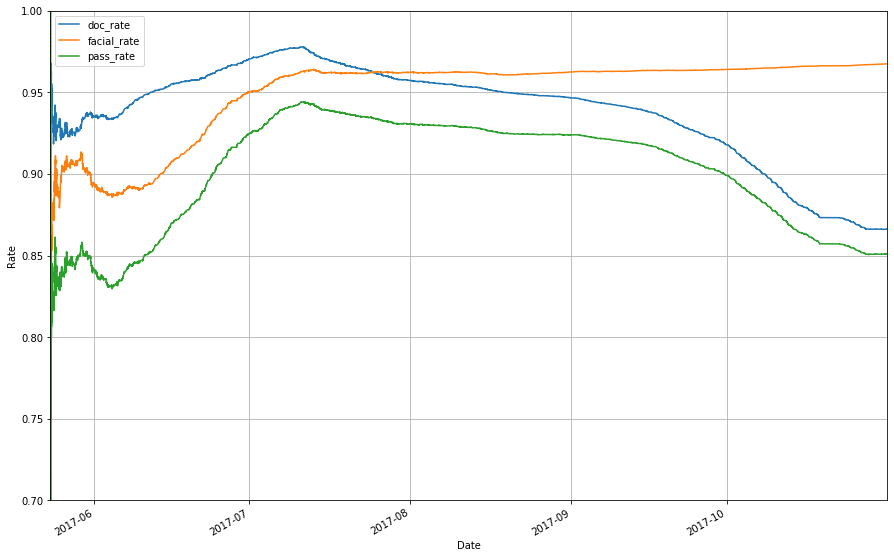

In [114]:
ax=pd.DataFrame(data=d).set_index('date').plot(
    figsize=(15,10),
    grid='on',
    )
ax.set_xlabel('Date')
ax.set_ylabel("Rate")
ax.set_ylim(0.7,1.0)


In this graph we compute the rate as the cumulative sum of clear in both facial and doc divided by all the attempts. This model has a very long memory (hence the very smooth behaviour of the curve as we go in time) and is hence highly biased. 
Another way of representing the pass rate to have a better understanding of the situation is to take the cumulative sum on sliding windows of fixed size (in the previous case we dont have sliding windows we have instead one window that gets larger at each observation i.e window of 1 at observaiton 1 and window of 142k at last observation). 

We have 161 dates and 142724 attempts (recall we have selected only one attempts for the users that attempted several times as such: if one of the attempts is a pass we select it, else we select the first attempt).

We hence have approx 2400 attempts by day. We can select sliding windows of 7*2400=16800 to have weekly memory.(daily takes too long to compute). Each point in the graph will hence represent the pass rate of the past week/day where the counts are initialised at 0 at the beginning of the sliding window at each iteration

ps: filtering by day and computing the daily pass rate results in highly biased estimated as for some days we have 3 observations and for some other we have 10k+


In [156]:
valid_data.iloc[0:2400].created_at_DOC.iloc[-1]

Timestamp('2017-06-06 15:20:13+0000', tz='UTC')

In [164]:
# cumsum starts to 0 at each iteration.

In [163]:
filtered_dates=[]
filtered_pass=[]
filtered_doc=[]
filtered_facial=[]

window=2400
for i in range(window, len(valid_data)):
    facial_clear=(valid_data.iloc[i-window:i].result_FACIAL == 'clear').cumsum().iloc[-1]
    doc_clear=(valid_data.iloc[i-window:i].result_DOC == 'clear').cumsum().iloc[-1]
    all_clear=( (valid_data.iloc[i-window:i].result_DOC =='clear') & (valid_data.iloc[i-window:i].result_FACIAL=='clear')).cumsum().iloc[-1]
    all_doc=((valid_data.iloc[i-window:i].result_DOC =='clear') | (valid_data.iloc[i-window:i].result_DOC !='clear')).cumsum().iloc[-1]
    date=valid_data.iloc[i-window:i].created_at_DOC.iloc[-1]
    
    filtered_dates.append(date)
    filtered_pass.append(all_clear/all_doc)
    filtered_doc.append(doc_clear/all_doc)
    filtered_facial.append(facial_clear/all_doc)
  


In [173]:
import matplotlib.pyplot as plt 
import seaborn as sns


#### Figure for window = 2400. More precise but too slow to run

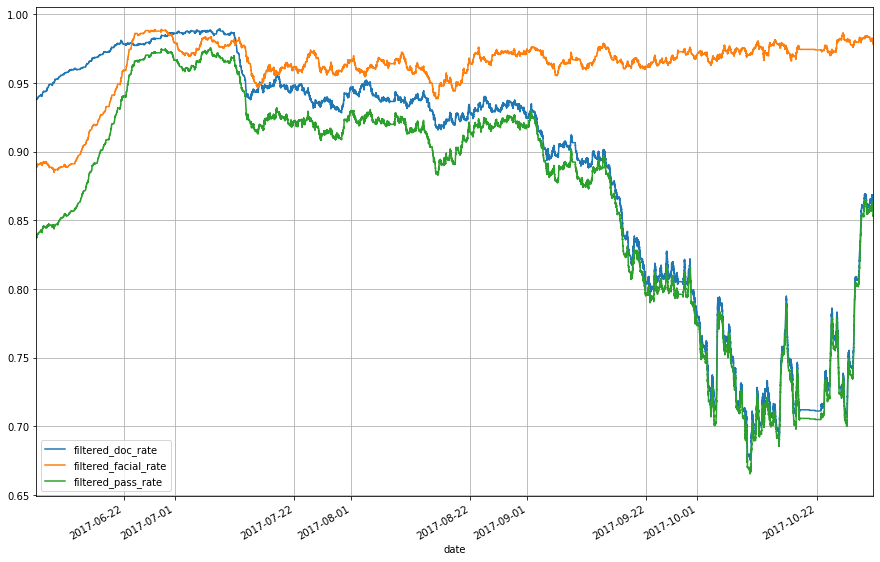

In [165]:
d = {'date': filtered_dates, 'filtered_doc_rate': filtered_doc, 
     'filtered_facial_rate':filtered_facial, 'filtered_pass_rate':filtered_pass}
pd.DataFrame(data=d).set_index('date').dropna().plot(figsize=(15,10), grid='on')

#### Figure for window = 16800

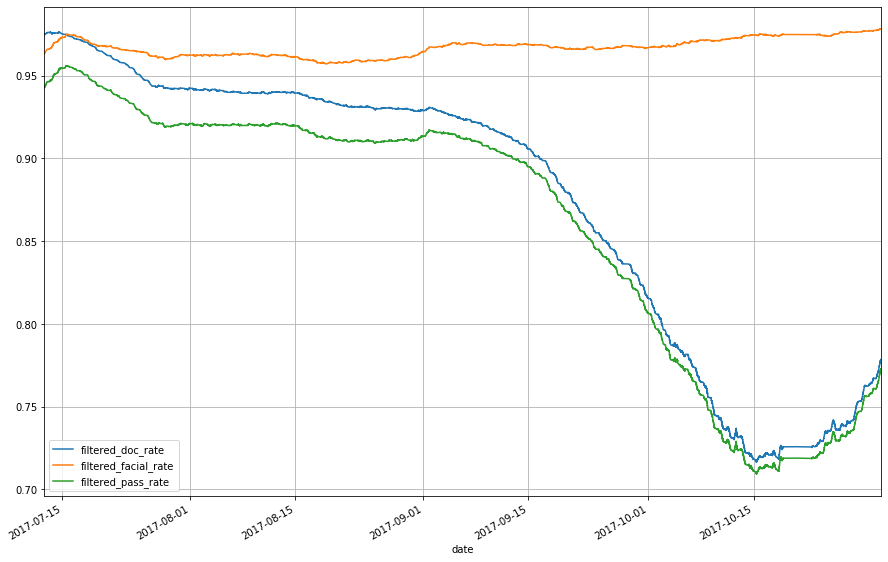

In [167]:
d = {'date': filtered_dates, 'filtered_doc_rate': filtered_doc, 
     'filtered_facial_rate':filtered_facial, 'filtered_pass_rate':filtered_pass}
pd.DataFrame(data=d).set_index('date').dropna().plot(figsize=(15,10), grid='on')

In [189]:
#remove facial features as irrelevant for the goal of the study.
relevant_features=[]
for feature in valid_data.columns:
    if (feature.endswith('FACIAL')) :
        if feature.startswith('result'):
            relevant_features.append(feature)
    else:
        relevant_features.append(feature)

In [194]:
valid_doc_data=valid_data[relevant_features]


In [243]:
binary=[]
for feat in valid_doc_data.columns:
    if 'clear'in valid_data[feat].tolist():
        binary.append(feat)

In [244]:
binary_valid_data=valid_doc_data[binary]

#### this cell takes a very long time to run

In [316]:
filtered_dates=[]
filtered_pass=[]
filtered_doc=[]
filtered_facial=[]

def get_pass_rate(i,window,feature,a,b):
    count=(valid_data.iloc[i-window:i][feature] == a).cumsum().iloc[-1]
    all_=( (valid_data.iloc[i-window:i][feature] ==a) | (valid_data.iloc[i-window:i][feature]==b)).cumsum().iloc[-1]
    return count/all_

def get_pass_rate_sub(i,window,feature,a):
    count=(valid_data.iloc[i-window:i][feature] == a).cumsum().iloc[-1]
    all_=( (valid_data.iloc[i-window:i][feature] ==a) | (valid_data.iloc[i-window:i][feature]!= a)).cumsum().iloc[-1]
    return count/all_

window=16800


colour_picture_PR = []
compromised_doc_PR=[]
conclusive_document_quality_PR=[]
data_comparison_PR=[]
data_consistency_PR=[]
data_validation_PR=[]
face_detection_PR=[]
image_integrity_PR=[]
image_quality_PR=[]
police_record_PR=[]
supported_doc_PR=[]
visual_auth_PR=[]

subresult_clear_PR=[]
subresult_suspected_PR=[]
subresult_rejected_PR=[]
subresult_caution_PR=[]

dates_PR=[]


for i in range(window, len(valid_data)):
    all_clear=( (valid_data.iloc[i-window:i].result_DOC =='clear') & (valid_data.iloc[i-window:i].result_FACIAL=='clear')).cumsum().iloc[-1]
    all_doc=((valid_data.iloc[i-window:i].result_DOC =='clear') | (valid_data.iloc[i-window:i].result_DOC !='clear')).cumsum().iloc[-1]
    
    colour_picture_PR.append(get_pass_rate(i,window,'colour_picture_result_DOC','clear','consider'))
    compromised_doc_PR.append(get_pass_rate(i,window,'compromised_document_result_DOC','clear','consider'))
    conclusive_document_quality_PR.append(get_pass_rate(i,window,'conclusive_document_quality_result_DOC','clear','consider'))
    data_comparison_PR.append(get_pass_rate(i,window,'data_comparison_result_DOC','clear','consider'))
    data_consistency_PR.append(get_pass_rate(i,window,'data_consistency_result_DOC','clear','consider'))
    data_validation_PR.append(get_pass_rate(i,window,'data_validation_result_DOC','clear','consider'))
    face_detection_PR.append(get_pass_rate(i,window,'face_detection_result_DOC','clear','consider'))
    image_integrity_PR.append(get_pass_rate(i,window,'image_integrity_result_DOC','clear','consider'))
    image_quality_PR.append(get_pass_rate(i,window,'image_quality_result_DOC','clear','unidentified'))
    police_record_PR.append(get_pass_rate(i,window,'police_record_result_DOC','clear','consider'))
    supported_doc_PR.append(get_pass_rate(i,window,'supported_document_result_DOC','clear','unidentified'))
    visual_auth_PR.append(get_pass_rate(i,window,'visual_authenticity_result','clear','consider'))
    
    subresult_clear_PR.append(get_pass_rate_sub(i,window,'sub_result_DOC','clear'))
    subresult_suspected_PR.append(get_pass_rate_sub(i,window,'sub_result_DOC','suspected'))
    subresult_rejected_PR.append(get_pass_rate_sub(i,window,'sub_result_DOC','rejected'))
    subresult_caution_PR.append(get_pass_rate_sub(i,window,'sub_result_DOC','caution'))
    
    facial_clear=(valid_data.iloc[i-window:i].result_FACIAL == 'clear').cumsum().iloc[-1]
    doc_clear=(valid_data.iloc[i-window:i].result_DOC == 'clear').cumsum().iloc[-1]
    all_clear=( (valid_data.iloc[i-window:i].result_DOC =='clear') & (valid_data.iloc[i-window:i].result_FACIAL=='clear')).cumsum().iloc[-1]
    all_doc=((valid_data.iloc[i-window:i].result_DOC =='clear') | (valid_data.iloc[i-window:i].result_DOC !='clear')).cumsum().iloc[-1]
    date=valid_data.iloc[i-window:i].created_at_DOC.iloc[-1]
    
    filtered_dates.append(date)
    filtered_pass.append(all_clear/all_doc)
    filtered_doc.append(doc_clear/all_doc)
    filtered_facial.append(facial_clear/all_doc)
    

    
    #compromised_doc_count=(valid_data.iloc[i-window:i].compromised_document_result_DOC == 'clear').cumsum().iloc[-1]
    #colour_picture_PR =colour_picture_count/all_dic



/Users/kamilbelkhayat/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in long_scalars
  if __name__ == '__main__':


In [317]:
d = {'date': filtered_dates, 'filtered_doc_rate': filtered_doc, 
     'filtered_facial_rate':filtered_facial, 'filtered_pass_rate':filtered_pass,
    'colour_picture_PR':colour_picture_PR, 'compromised_doc_PR':compromised_doc_PR,
    'conclusive_document_quality_PR':conclusive_document_quality_PR, 'data_comparison_PR':data_comparison_PR,
    'data_consistency_PR':data_consistency_PR, 'data_validation_PR':data_validation_PR,
    'face_detection_PR':face_detection_PR, 'image_integrity_PR':image_integrity_PR,'image_quality_PR':image_quality_PR,
     'police_record_PR':police_record_PR,'supported_doc_PR':supported_doc_PR,'visual_auth_PR':visual_auth_PR,
     'subresult_clear_PR':subresult_clear_PR,'subresult_suspected_PR':subresult_suspected_PR,'subresult_rejected_PR':
     subresult_rejected_PR, 'subresult_caution_PR':subresult_caution_PR
    }

In [322]:

rate_data=pd.DataFrame(data=d).set_index('date')

In [325]:
rate_data['subresult_FR']=1-rate_data.subresult_clear_PR

In [323]:
rate_data.to_pickle("rate_data.pkl")

In [367]:
valid_data.to_pickle('valid_data.pkl')

In [368]:
data.to_pickle('data.pkl')

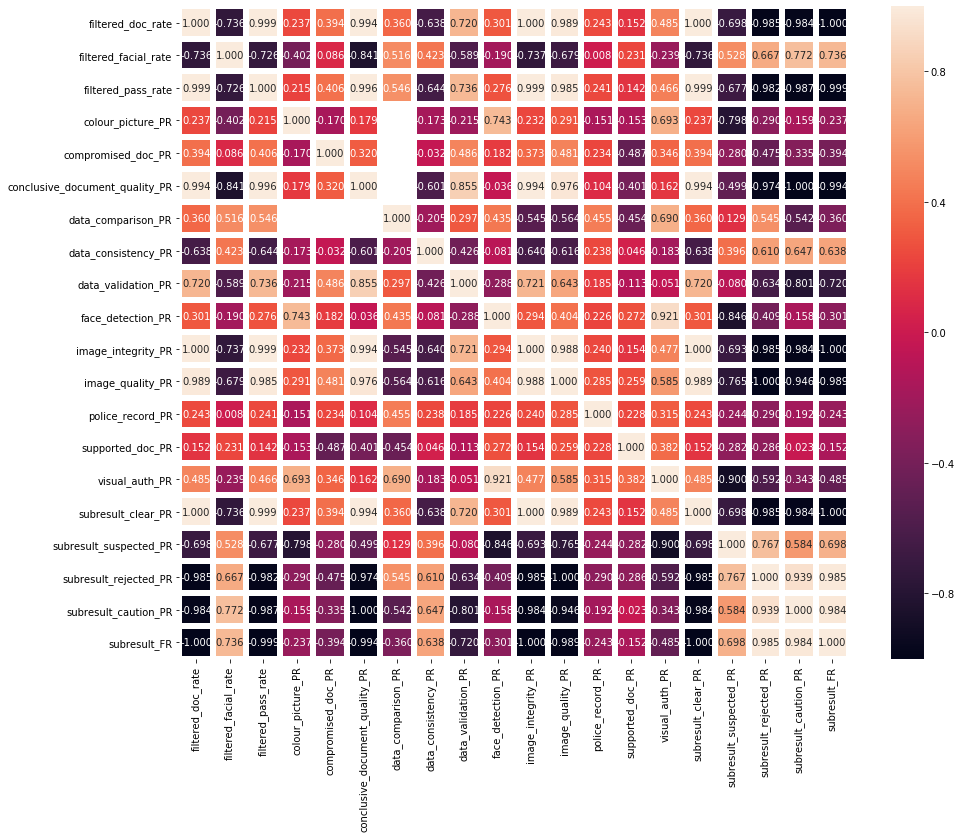

In [332]:
data_corr  = rate_data.corr()
# correlation map plotting
f,ax = plt.subplots(figsize =(15,12))
sns.heatmap(data_corr, annot = True, linewidths = 5, fmt = '.3f', ax = ax)
plt.show()